In [2]:
import requests
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## LOADING DATA

In [3]:
df=pd.read_excel('./COVID-19-geographic-disbtribution-worldwide-2020-06-29.xlsx')
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
0,2020-06-29,29,6,2020,351,18,Afghanistan,AF,AFG,38041757.0,Asia
1,2020-06-28,28,6,2020,165,20,Afghanistan,AF,AFG,38041757.0,Asia
2,2020-06-27,27,6,2020,276,8,Afghanistan,AF,AFG,38041757.0,Asia
3,2020-06-26,26,6,2020,460,36,Afghanistan,AF,AFG,38041757.0,Asia
4,2020-06-25,25,6,2020,234,21,Afghanistan,AF,AFG,38041757.0,Asia


In [4]:
df.tail()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
26557,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa
26558,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa
26559,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa
26560,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa
26561,2020-03-21,21,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa


In [5]:
#getting information of data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26562 entries, 0 to 26561
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dateRep                  26562 non-null  datetime64[ns]
 1   day                      26562 non-null  int64         
 2   month                    26562 non-null  int64         
 3   year                     26562 non-null  int64         
 4   cases                    26562 non-null  int64         
 5   deaths                   26562 non-null  int64         
 6   countriesAndTerritories  26562 non-null  object        
 7   geoId                    26455 non-null  object        
 8   countryterritoryCode     26498 non-null  object        
 9   popData2019              26498 non-null  float64       
 10  continentExp             26562 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 2.2+ MB


In [6]:
df.describe()

,day,month,year,cases,deaths,popData2019
count,26562.000000,26562.000000,26562.000000,26562.000000,26562.000000,2.649800e+04
mean,16.207929,4.194790,2019.997478,380.722611,18.882690,4.689196e+07
std,8.745421,1.555569,0.050161,2172.430663,121.386696,1.675462e+08
min,1.000000,1.000000,2019.000000,-2461.000000,-1918.000000,8.150000e+02
25%,9.000000,3.000000,2020.000000,0.000000,0.000000,1.919968e+06
50%,17.000000,4.000000,2020.000000,4.000000,0.000000,8.776119e+06
75%,24.000000,5.000000,2020.000000,68.000000,1.000000,3.194979e+07
max,31.000000,12.000000,2020.000000,54771.000000,4928.000000,1.433784e+09


## CLEANING DATA

In [7]:
#changing the column names
df.columns=['date','day','month','year','cases','deaths','country',
'old_country_code','country_code','population','continent']

In [8]:
#Dropping the redundant column name
df.drop(['old_country_code'],axis=1,inplace=True)

In [9]:
#creating new df because of removing the december 2019
df1=df[df.month!=12]

In [10]:
#checking if there is null value
df1.isna().sum().sum()/len(df1)
df1.dropna(inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [21]:
#Aggregating the data by country name
df_by_country=df1.groupby('country')['cases','deaths'].sum()
df_by_country

C:\Users\hp\AppData\Local\Temp/ipykernel_14188/1858615970.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_by_country=df1.groupby('country')['cases','deaths'].sum()


,cases,deaths
country,,
Afghanistan,30967,721
Albania,2402,55
Algeria,13273,897
Andorra,855,52
Angola,267,11
...,...,...
Vietnam,355,0
Western_Sahara,208,1
Yemen,1118,302


In [22]:
#Adding a new column for the mortality rate which is the ratio of the number of deaths to cases
df_by_country['mortality_rate']=df_by_country['deaths']/df_by_country['cases']

## VISUALIZING DATA 

### Which are the countries with the worst mortality rates?

Text(0.5, 1.0, 'Countries with highest mortality rates COVID-19')

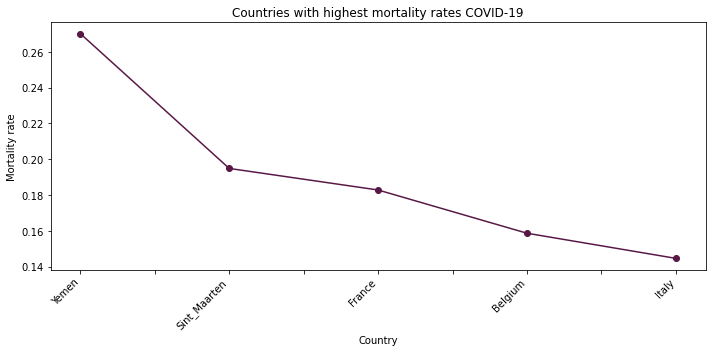

In [50]:
plt.figure(figsize=(10,5), tight_layout=True)
color1 = ['#581845']
ax=df_by_country['mortality_rate'].sort_values(ascending=False).head(5).plot(kind='line',color= color1, marker='o')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_xlabel("Country")
ax.set_ylabel("Mortality rate")
ax.set_title("Countries with highest mortality rates COVID-19")

### Which are the countries with the maximum cases?

Text(0.5, 1.0, 'Top ten countries by COVID-19 cases load')

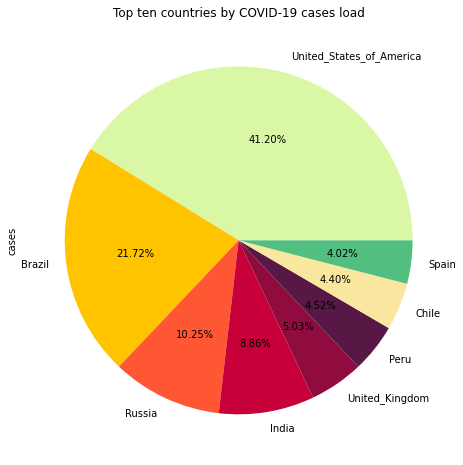

In [24]:
import random
import matplotlib.colors as mcolors
df_cases=df_by_country['cases'].sort_values(ascending=False)
mcolors.CSS4_COLORS
color = random.choices(list(mcolors.CSS4_COLORS.values()),k = 10)
colorss = ['#DAF7A6', '#FFC300', '#FF5733', '#C70039', '#900C3F', '#581845', '#F9E79F', '#52BE80']
ax=df_cases.head(8).plot(kind='pie',autopct='%.2f%%',colors = colorss, labels=df_cases.index,figsize=(12,8))
ax.set_title("Top ten countries by COVID-19 cases load")

###  Which are the countries with the most fatalities COVID-19?  

Text(0, 0.5, 'Number of deaths')

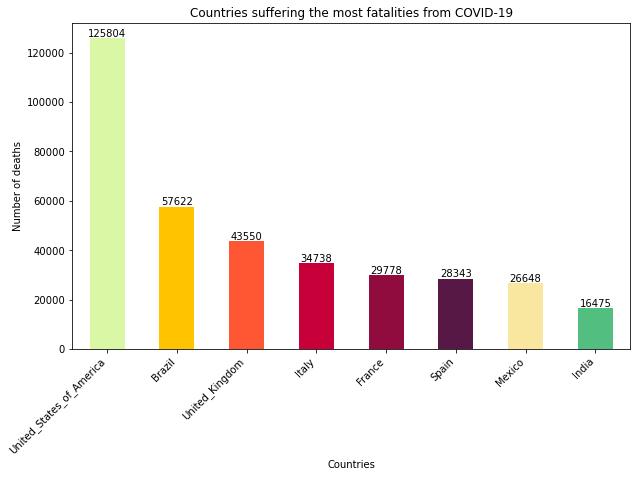

In [29]:
plt.figure(figsize=(10,6))
ax=df_by_country['deaths'].sort_values(ascending=False).head(8).plot(kind='bar', color = colorss)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='bottom')
ax.set_title("Countries suffering the most fatalities from COVID-19")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of deaths")

### What is the monthly trend the number of cases and fatalities since the start of the pandemic? (6 months)

C:\Users\hp\AppData\Local\Temp/ipykernel_14188/1721915026.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_by_month=df1.groupby('month')['cases','deaths'].sum()


Text(0, 0.5, 'Number of deaths')

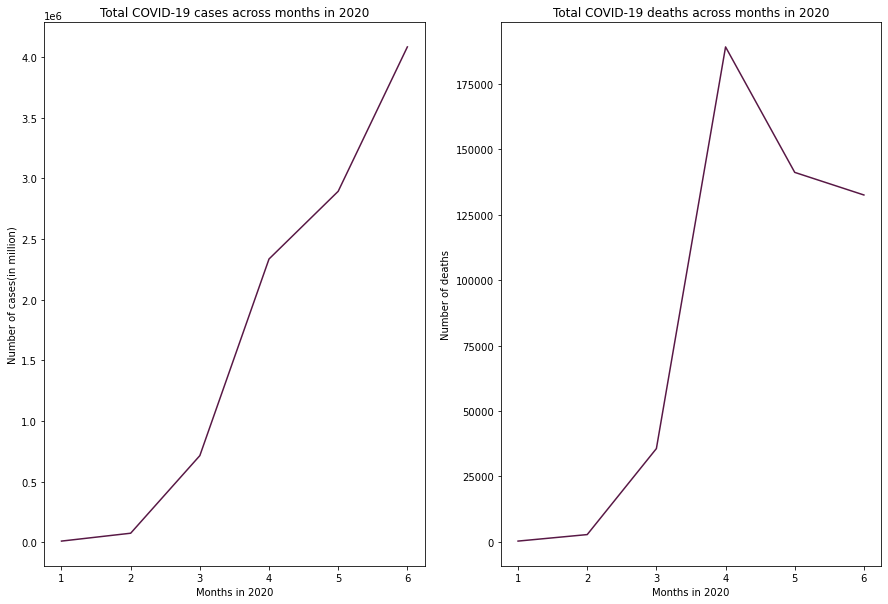

In [51]:
df_by_month=df1.groupby('month')['cases','deaths'].sum()
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
df_by_month['cases'].plot(kind='line',ax=ax1, color= color1)
ax1.set_title("Total COVID-19 cases across months in 2020")
ax1.set_xlabel("Months in 2020")
ax1.set_ylabel("Number of cases(in million)")
df_by_month['deaths'].plot(kind='line',ax=ax2, color= color1)
ax2.set_title("Total COVID-19 deaths across months in 2020")
ax2.set_xlabel("Months in 2020")
ax2.set_ylabel("Number of deaths")

### In some of the countries, lockdowns were imposed to help flatten the curve. Did this measure aid in reducing the number of cases?

In [33]:
#Creating DataFrames for each country
#Germany
df_germany=df1[df1.country=='Germany']
df_germany_monthwise=df_germany.groupby('month')['cases','deaths'].sum()
df_germany_grouped=df_germany_monthwise.reset_index()
#UK
df_uk=df1[df1.country=='United_Kingdom']
df_uk_monthwise=df_uk.groupby('month')['cases','deaths'].sum()
df_uk_grouped=df_uk_monthwise.reset_index()
#India
df_india=df1[df1.country=='India']
df_india_monthwise=df_india.groupby('month')['cases','deaths'].sum()
df_india_grouped=df_india_monthwise.reset_index()
#Italy
df_italy=df1[df1.country=='Italy']
df_italy_monthwise=df_italy.groupby('month')['cases','deaths'].sum()
df_italy_grouped=df_italy_monthwise.reset_index()

C:\Users\hp\AppData\Local\Temp/ipykernel_14188/2036693364.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_germany_monthwise=df_germany.groupby('month')['cases','deaths'].sum()
C:\Users\hp\AppData\Local\Temp/ipykernel_14188/2036693364.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_uk_monthwise=df_uk.groupby('month')['cases','deaths'].sum()
C:\Users\hp\AppData\Local\Temp/ipykernel_14188/2036693364.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_india_monthwise=df_india.groupby('month')['cases','deaths'].sum()
C:\Users\hp\AppData\Local\Temp/ipykernel_14188/2036693364.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_italy_monthwise=df_italy.g

Text(0.5, 1.0, 'Cases in Germany across months')

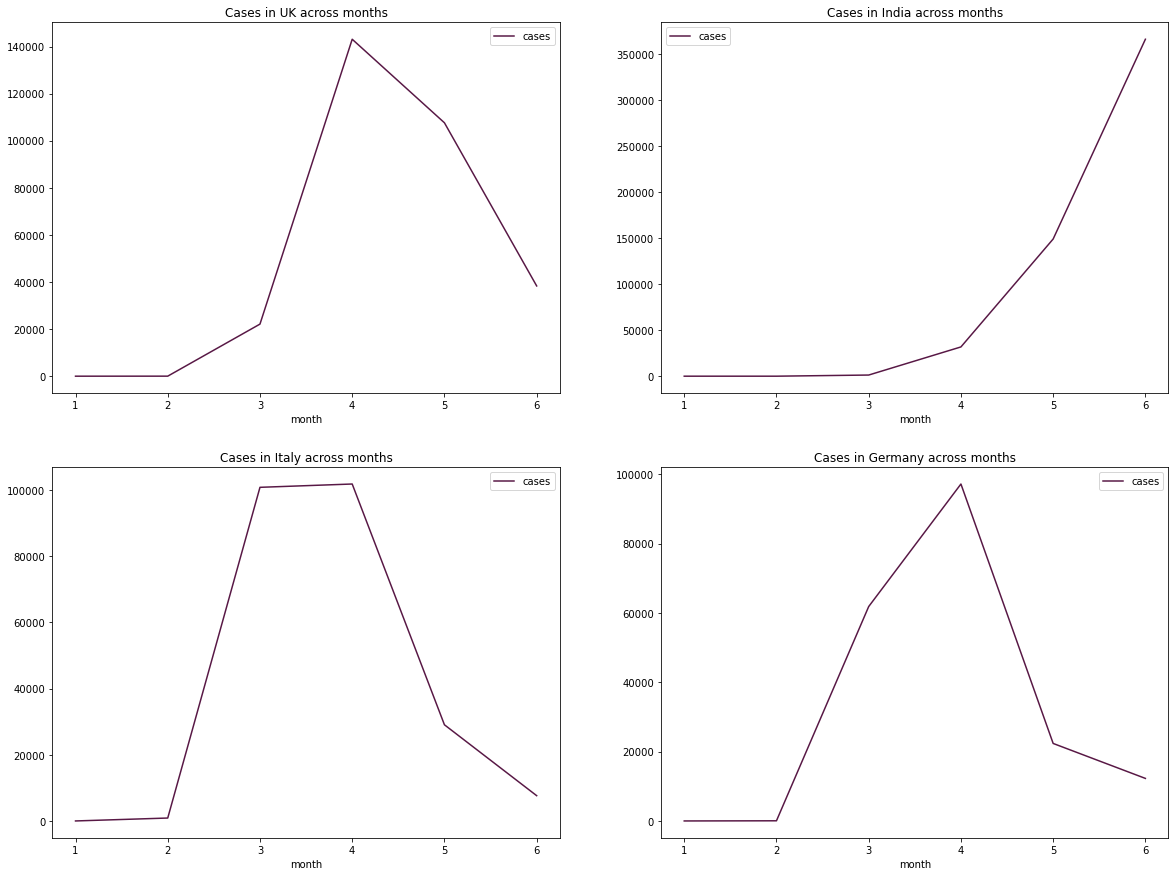

In [52]:
#Plotting the data for four countries (UK, India, Italy and Germany) where lockdowns were imposed
fig=plt.figure(figsize=(20,15))
ax1=fig.add_subplot(2,2,1)
df_uk_grouped.plot(kind='line',x='month',y='cases',ax=ax1, color= color1)

ax1.set_title("Cases in UK across months")
ax2=fig.add_subplot(2,2,2)
df_india_grouped.plot(kind='line',x='month',y='cases',ax=ax2, color= color1)

ax2.set_title("Cases in India across months")
ax3=fig.add_subplot(2,2,3)
df_italy_grouped.plot(kind='line',x='month',y='cases',ax=ax3, color= color1)

ax3.set_title("Cases in Italy across months")
ax4=fig.add_subplot(2,2,4)
df_germany_grouped.plot(kind='line',x='month',y='cases',ax=ax4, color= color1)

ax4.set_title("Cases in Germany across months")